In [43]:
# importing python libraries
import pandas as pd
import numpy as np

# plotting modules
import seaborn as sns
import missingno

# importing matplotlib
import matplotlib.pyplot as plt

# Data Analysis Of Titanic Dataset 

Using the titanic dataset to provide an indepth EDA and answer the following three questions.

- What is the most important factor in determining survival of the Titanic incident?
- In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
- “Women and children first”. Was this the case?

## Analysing Dataset

Here I will check for empty rows and colums that I need to remove from the dataset and also confirm the dimensions of the dataframe.

In [44]:
# variable containing the name of the file
file = 'Titanic.csv'

# titanic csv file dataframe
titanic_df = pd.read_csv(file)

# viewing the first five rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# viewing the last five rows
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [46]:
# checking the dimensions of the dataframe
titanic_df.shape

(891, 12)

There are 891 rows and 12 columns in the dataframe and there are no empty rows at the beginning and end of the dataframe that need to be romoved. The next step is to check for all the missing data in the columns, but before that we need to set the PassengerId column as our dataframe index.

In [47]:
# Setting PassengerId column as index
titanic_df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Handling Missing Data

First thing to do is to locate the missing data in the dataframe, a visualisation of the dataframe will make it is easier to get a quick sense of the spread of the missing data and which columns have a lot of missing data.

<Axes: >

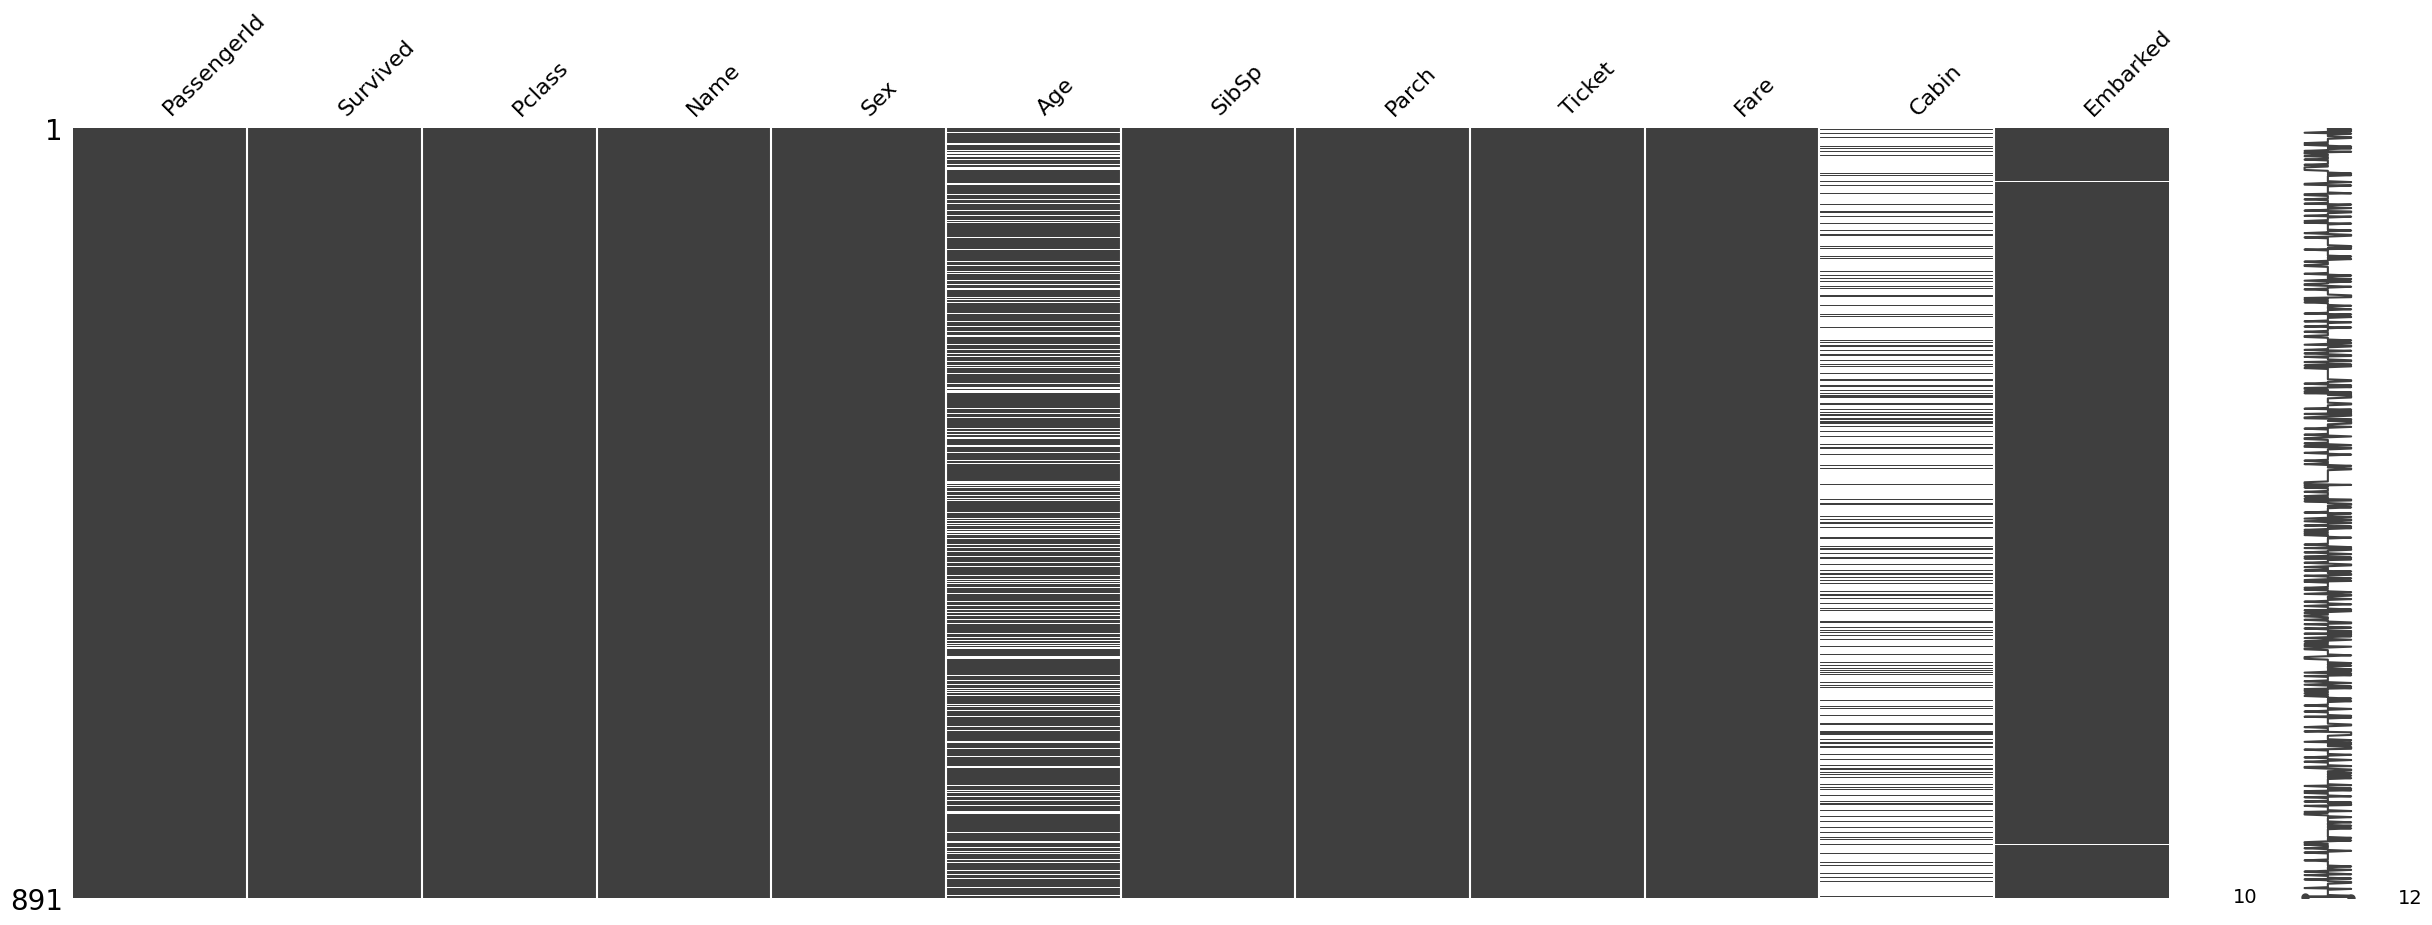

In [48]:
# Plot graphic of missing values
missingno.matrix(titanic_df, figsize = (30,10))

In the plot above we can see that most of the missing data is in two columns namely Age and Cabin, with most of the missing data in the Cabin column. The third column with missing data is the Embarked column and it seems only 2 data points are missing. Below we will check the actual numbers of these missing datapoint and the extent of their effect on the dataset.

In [49]:
# getting the number of missing data points per column
missing_datapoints = titanic_df.isnull().sum()

# number of missing points in the columns
missing_datapoints

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The above information confirms what we could deduce from our plot, that only 3 columns have missing data. But now we need to see what percentage of the overall dataset these missing values make.

In [50]:
# getting the total number of cells 
total = np.product(titanic_df.shape)

# gettng total number of missing data points
missing_data_total = missing_datapoints.sum()

# checking the percentage of missing data
percent = f"{round((missing_data_total/total)*100,2)}%"

print("Percentage of missing datapoints is",percent)

Percentage of missing datapoints is 8.1%


It seems less than 9% of the data points are missing, so we can still work with this dataset. Now we need to decide on how to handle the missing data. Below are the questions we are trying to tackle when analysing this dataset.

- What is the most important factor in determining survival of the Titanic incident?
- In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
- “Women and children first”. Was this the case?

In analysing the above questions, it seems that the cabin information will not be relevant as we already have the passenger class information, so this column will be dropped. Another reason to drop this column is that the missig data is a lot as it makes up 77% of the column data and imputation will be difficult.

In [51]:
# dropping the Cabin column
titanic_df.drop('Cabin',axis=1, inplace=True)

# first five rows of the new dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Before we deal with the missing data on the Age column, lets explore the other colums in the dataframe to see what we can learn about them and if there any inconsistencies we need to worry about.

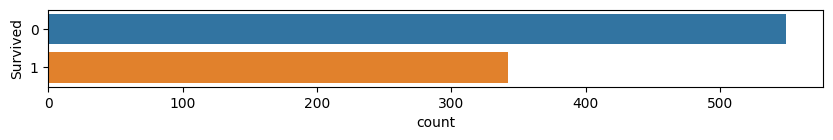

In [52]:
# plot of the Survived column
fig = plt.figure(figsize=(10,1))
sns.countplot(y=titanic_df['Survived'], data=titanic_df);

In [53]:
titanic_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

Looking at the information above, it seems that a majority of the passengers in the Titanic did not survive the incident. Of course from the above we can not tell which groups are these but at least for now we can be confident there are no inconsistencies in the binary variable entries.

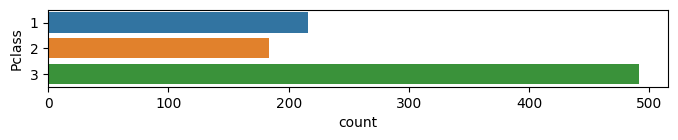

In [54]:
# plot of the Pclass column
fig = plt.figure(figsize=(8,1))
sns.countplot(y=titanic_df['Pclass'], data=titanic_df);

In [55]:
titanic_df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

From the above figure we can see only 3 passenger classes were recorded for this dataset and it seems the majority of the passengers were third class passengers. No inconsistencies in the entries of the column in terms of class type.

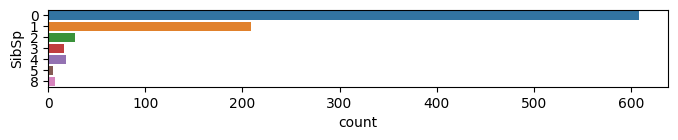

In [56]:
# plot of the SibSp column
fig = plt.figure(figsize=(8,1))
sns.countplot(y=titanic_df['SibSp'], data=titanic_df);

In [57]:
titanic_df.groupby('SibSp')['SibSp'].count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

From the data above it seems the majority of the passengers did not travel with a sibling or a spouse, but this does not neccessarilly mean they came alone as they could have brought along a child or a parent. Some passengers brought up to 8 siblings and a spouse. This will be interesting to anlyse how it affects the chances of survival.

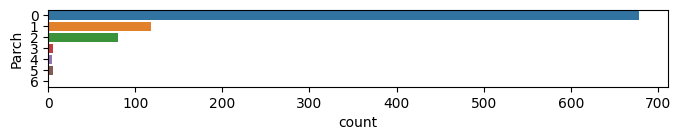

In [58]:
# plot of the Parch column
fig = plt.figure(figsize=(8,1))
sns.countplot(y=titanic_df['Parch'], data=titanic_df);

In [59]:
titanic_df.groupby('Parch')['Parch'].count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

From the data above it seems the majority of the passengers did not travel with a parent or a child, but this does not neccessarilly mean they came alone as they could have brought along a sibling or a spouse. This will be interesting to anlyse how it affects the chances of survival.

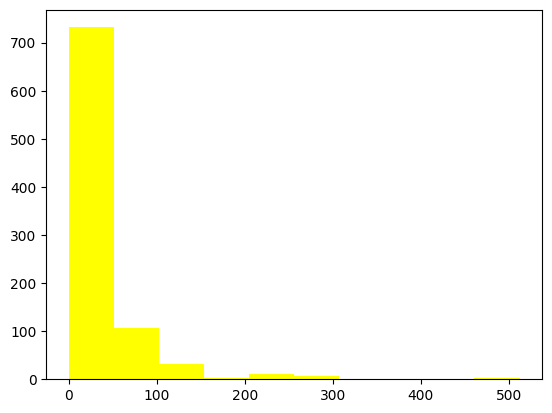

In [60]:
plt.hist(titanic_df['Fare'],facecolor="yellow")
plt.show()

From the histogram above the range for the fare is from 0 to 500. This is a reasonable range for a fare and no negative amounts are found on the column.

## Data Imputation

Lets first create a new column called 'Title' which will contain the titles of all the passengers in the Titanic. This will help with investigating how titles were used with respect to age and gender. These titles will be extracted from the Name column.

In [61]:
# checking the datatype of the Name column
titanic_df['Name'].dtype

dtype('O')

The datatype of the column is that of an object. In order to extract the titles I need the column to be a String datatype.Below I will convert the column type to String and create a new Title column with the extracted titles.

In [62]:
# converting the Name column type
titanic_df['Name'] = titanic_df['Name'].astype("string")

# checking the datatype of the Name column
titanic_df['Name'].dtype

string[python]

In [63]:
# getting indexes characters before title
index_1 = np.array(titanic_df['Name'].str.index(', '))

# getting indexes of points after title
index_2 = np.array(titanic_df['Name'].str.index('.'))

# array of all the names
name_array = np.array(titanic_df['Name'])

# list to store extracted titles
titles = []

# variable for indexing
index = 0

# looping for names in the array
for name in name_array:
    
    # getting the title
    title = name[index_1[index] + 1:index_2[index]]
    
    titles.append(title) # adding title to list
    
    index += 1 # updating indexing 

# adding column to dataframe
titanic_df['Title'] = pd.DataFrame(titles)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [64]:
titanic_df['Title'].unique() # displaying unique titles

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

From the information above we can see that some titles have the same meaning. Titles such as 'Mme', 'Mrs', we will use one title for all titles with the same meanings.

In [65]:
# old titles to replace
old_titles = [' Mme',' Mlle',' Ms',' Don',' Jonkheer']

# new titles to replace with
new_titles = [' Mrs',' Miss',' Miss',' Mr',' Mr']

# replacing titles
titanic_df['Title'] = titanic_df['Title'].replace(old_titles,new_titles)

titanic_df['Title'].unique() # displaying unique titles

array([' Mr', ' Mrs', ' Miss', ' Master', ' Rev', ' Dr', ' Major',
       ' Lady', ' Sir', ' Col', ' Capt', ' the Countess'], dtype=object)

In [66]:
# getting the masters data
Masters = titanic_df[titanic_df.Title == ' Master']

max_age = Masters['Age'].max() # maximum age

min_age = Masters['Age'].min() # minimum age

print("Minimun Master age =",min_age,"Maximum Master age =",max_age)

Minimun Master age = 0.42 Maximum Master age = 12.0


From the titles above, we can group the passengers into 3 groups, Masters (Young Males), Females [Mrs,Miss,Lady etc] and Older Males [Mr, Sir etc]. The reason for this is that in observing the data, the ages for the passengers with the title of Master are from 0 to 12 years of age and it seems the Masters are young males. The ages for the female passengers are not easy to breakdown as the titles are used for wide ranges of ages, so this group of passengers will all be grouped together.

With this information I will perform similar case imputation for the missing ages.

In [67]:
# old titles to replace
old_titles = [
    
    ' Mrs',' Miss',' Lady',' the Countess',' Mr',
    ' Rev', ' Dr', ' Major',' Sir', ' Col', ' Capt'
    ]

# new titles to replace with
new_titles = [
    
    ' Female',' Female',' Female',' Female',' Male',
    ' Male',' Male',' Male',' Male',' Male',' Male',
    ]

# replacing titles
titanic_df['Title'] = titanic_df['Title'].replace(old_titles,new_titles)

titanic_df['Title'].unique() # viewing unique values

array([' Male', ' Female', ' Master'], dtype=object)

In [68]:
# grouping data by title 
group = titanic_df.groupby('Title')['Age'].transform('median')

# similar case imputation of the median
titanic_df['Age'].fillna(group, inplace = True)

# mode imputation for the Embarked column (categorical variable)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace = True)

titanic_df.info() # displaying dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(4), string(1)
memory usage: 83.7+ KB


Now that the missing data points have been handled, the next step is to analyse the dataset to gain insights about surviving the Titanic incident.

## Data Exploration

Before the analysis of the data begins, I will add two new columns containing the number of family members and one which will contain information about whether a person is travelling alone or not. These will help with the analysis of survival chances when you are alone compared to having a family.

In [69]:
# getting family members count for passengers
family_count = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# creating a new column of the family count
titanic_df['family_count'] = pd.DataFrame(family_count)

# checking which passengers travelled alone
alone = []

# populating the alone list
for number in family_count:
    
    if number == 1:
        
        # one represent those travelling alone
        alone.append(1)
    
    else:
        
        # zero represents those with people
        alone.append(0)

# adding a new column counting lone travellers
titanic_df['TravAlone'] = pd.DataFrame(alone)

# first five rows with new colums
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,family_count,TravAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Male,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Female,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Female,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Female,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Male,1,1


One more step is to analyse the data in the Age column and see the minimum and maximum ages and how I may have to group these ages together. This will help in analysing the survival of people according to age groups.

In [70]:
# plot of the Age column
fig = plt.figure(figsize=(200,80))
sns.countplot(y=titanic_df['Age'], data=titanic_df);

The above visualisation of the ages in the dataset is very messy and not clear to see. This makes hard to get any insights from the plot. The Age column has many unique values and categories and therefore I have to group them.

In [71]:
titanic_df['Age'].unique() # unique ages

array([22.  , 38.  , 26.  , 35.  , 30.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  ,  3.5 , 17.  ,
       32.  , 16.  , 25.  ,  0.83, 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [72]:
# minimum age
age_min = titanic_df['Age'].min()

# maximum age
age_max = titanic_df['Age'].max()

print("Minimum age =",age_min,"Maximum age =",age_max)

Minimum age = 0.42 Maximum age = 80.0


There are many unique values for the Age column and these ages range from zero years to 80 years. Below I will group the ages from 0 to 12 for kids, 13 to 19 for teenagers and for the adults I will group them by decade.

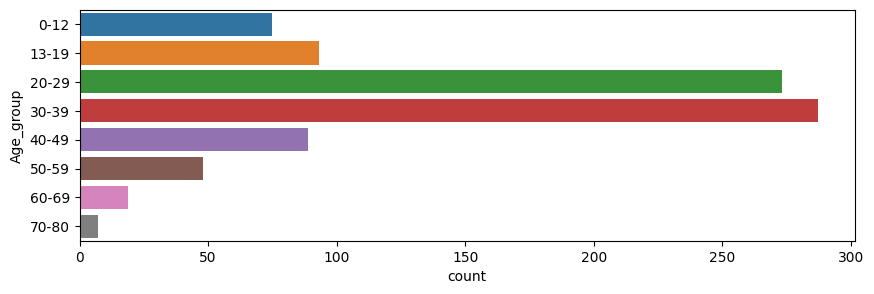

In [73]:
# grouping ages into a new Age_group column
titanic_df['Age_group'] = pd.cut(titanic_df['Age'], [0,13, 19, 29,39, 49,59,69,80], 
                   labels=['0-12', '13-19', '20-29','30-39','40-49','50-59',
                           '60-69','70-80'])

# displaying the Age_group plot
fig = plt.figure(figsize=(10,3))
sns.countplot(y=titanic_df['Age_group'], data=titanic_df);

From the plot above we can see that the majority of the passengers are between the ages of 20 and 39 years old. From here on we can start to look at the survival of the passengers based on Sex, Pclass, Age_group etc.

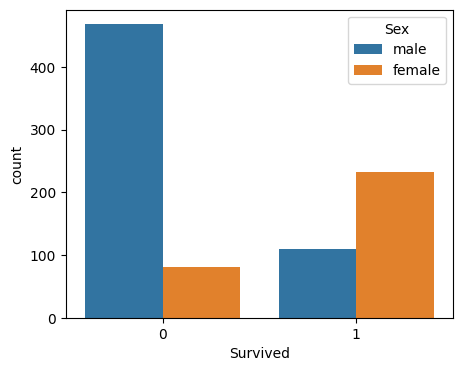

In [74]:
# plot of the survival by Gender
fig = plt.figure(figsize=(5,4))
sns.countplot(x=titanic_df['Survived'], hue = 'Sex', data=titanic_df);

From the plot above it seems a significant number of male passengers did not survive the Titanic crash. This could be because females were given preferrence when it came to rescue or a lot of males were on the ship.

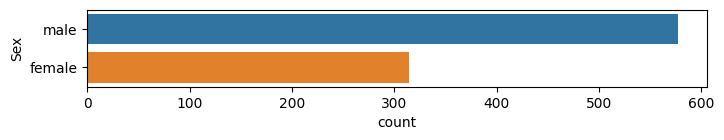

In [75]:
# plot of the Gender numbers
fig = plt.figure(figsize=(8,1))
sns.countplot(y=titanic_df['Sex'], data=titanic_df);

Indeed a lot of males were on the ship, almost double the number of females. But even when taking that into account, a significant number of the female passengers managed to survive the incident while the opposite was true for the male passengers. So it seems being female gave you a better chance of survival, now lets see if your passenger class improved your chances of survival.

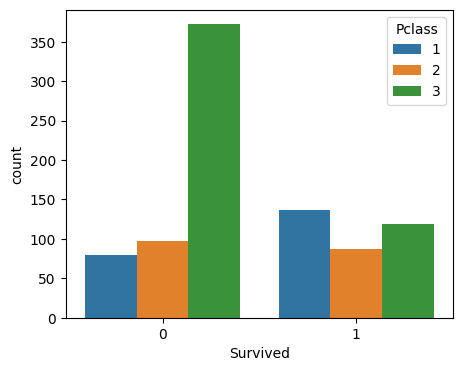

In [76]:
# plot of the Pclass variable
fig = plt.figure(figsize=(5,4))
sns.countplot(x=titanic_df['Survived'], hue = 'Pclass', data=titanic_df);

It seems that the passengers who had third class tickets are the ones who had a lower survival rate compared to the other two classes. Of course the passengers in the third class were the majority of the passengers in the boat but similar to the case of gender, it was not the numbers that mattered but the class you were in as the other two class have a smaller difference between those who survived and those who died.

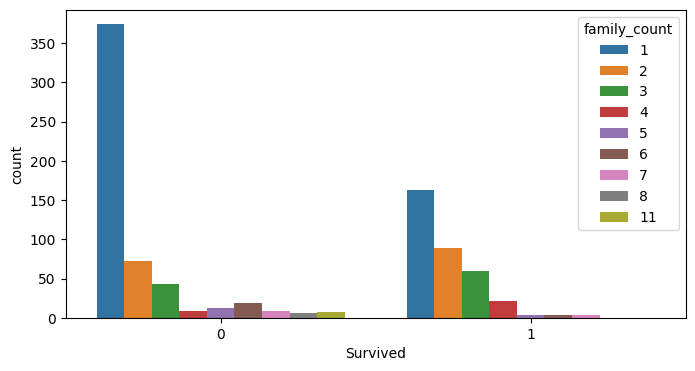

In [77]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x=titanic_df['Survived'], hue = 'family_count', data=titanic_df);

Though it seems that the majority of the people who did not survive are those who were travelling alone, it is interesting to notice that none of the people who had family members of at least 8 survived. 

For those who were travelling alone it could be that no one was looking out for them as people were concerned with their lives and those of loved ones. The people who had families and died, couldve died while saving the people they cared for. 

Now I need to check which gender were the people who were travelling alone and which class of passengers the majority of them belonged to. These people could be the contributing factor to the high numbers of males and third class passenger numbers for those who did not survive.

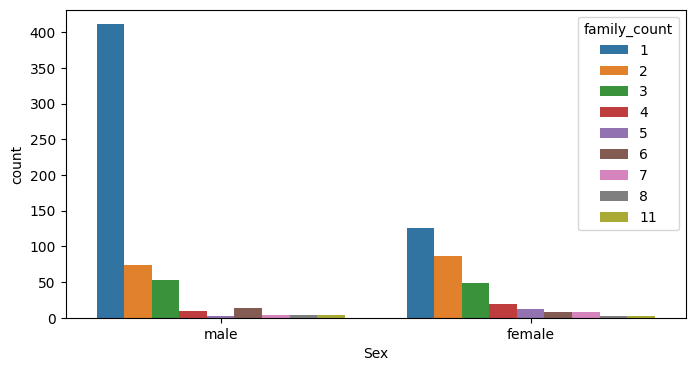

In [78]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x=titanic_df['Sex'], hue = 'family_count', data=titanic_df);

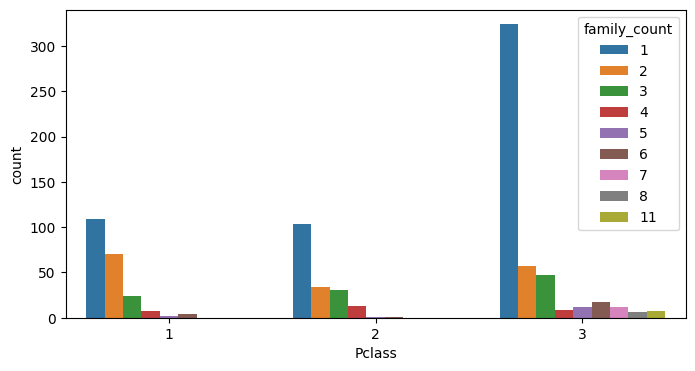

In [79]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x=titanic_df['Pclass'], hue = 'family_count', data=titanic_df);

As suspected the majority of the passengers that were travelling alone were third class passengers and they were mostly male. Another interesting thing to note is that the passengers who had families of at least 8 are all in the third class.

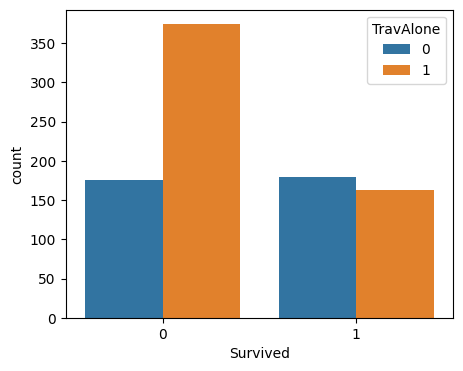

In [80]:
fig = plt.figure(figsize=(5,4))
sns.countplot(x=titanic_df['Survived'], hue = 'TravAlone', data=titanic_df);

But still travelling alone did not help when it came to surviving the incident. The plot above shows that people who travelled with family had a 50/50 chance of survival compared to loners. Below we will look at how age contributed to survival.

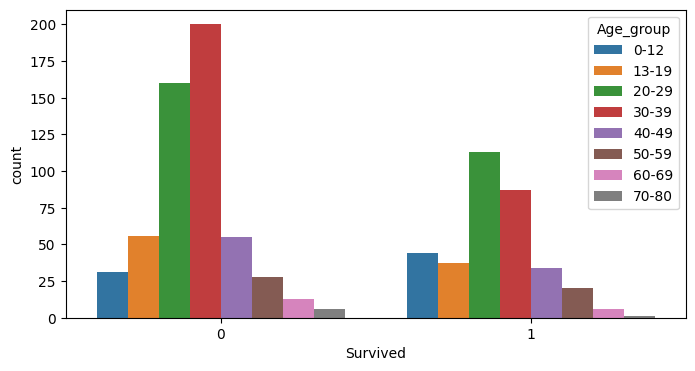

In [81]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x=titanic_df['Survived'], hue = 'Age_group', data=titanic_df);

A significant number of passengers in the age range of 20 to 39 years did not survive the incident. But as we noted earlier this was also the largest group of people in the boat. More children between 0 and 12 year survived compared to those who died, while in the other age groups the number of deaths are higher than those who survived but although the difference is not too significant in numbers excluding the 20 to 39 years range which has a significant difference.

**Question: What is the most important factor in determining survival of the Titanic incident?**

Being a child is the most important factor in determining if you were gonna survive the incident. Most of the children were in the third class but still the survival rate of the children does not show that much difference between those who survived and those that died.

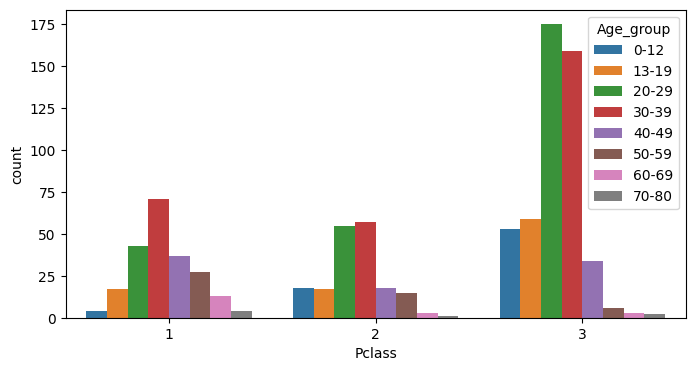

In [82]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x=titanic_df['Pclass'], hue = 'Age_group', data=titanic_df);

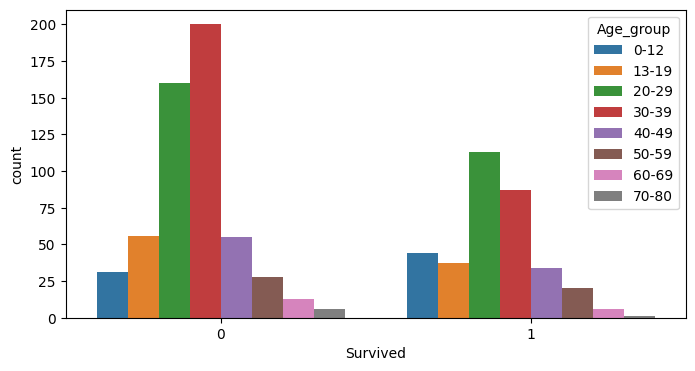

In [83]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x=titanic_df['Survived'], hue = 'Age_group', data=titanic_df);

**Question: In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?**

Yes, the upper classes have a small difference in the number of survivors compared to those who died. The first class has more survivors compared to those who died and even though the second class has more people dead to those that survived, the numbers do not show a huge difference. The third class is where it shows that many people had to find ways to survive on their own as the difference in the numbers of people who died to those who survived is significant (more people died).

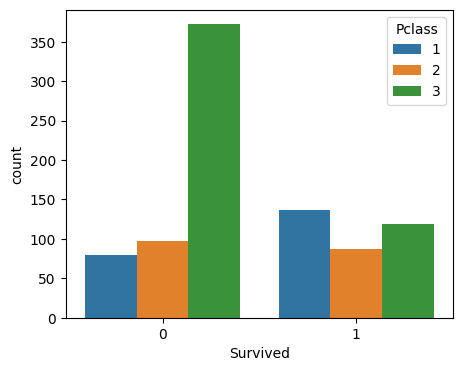

In [84]:
# plot of the Pclass variable
fig = plt.figure(figsize=(5,4))
sns.countplot(x=titanic_df['Survived'], hue = 'Pclass', data=titanic_df);

**Question: “Women and children first”. Was this the case?**

Yes this was the case as the data shows that a significant number of women survived compared to man, and also most of the children were in the third class but still the survival rate of the children does not show that much difference between those who survived and those that died. 

**Another Observation**

A lot of poor people who were probably immigrants travelling from Europe to New York for an opportunity to a better life were on the titanic and a majority of them died. These were the people who were travelling alone in the third class and they were mostly male. Since a majority of the children were also in the third class, most likey some of these people sacrificed their lives for their children.